Plotting...
Generating plots for Candidate: gen_7_cand_42, Run: 24-3-24_5sec_baselineSearch_75-25
Generating...
Error loading existing images at: /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output/24-3-24_5sec_baselineSearch_75-25/gen_7/gen_7_cand_42
Loading file /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output/24-3-24_5sec_baselineSearch_75-25/gen_7/gen_7_cand_42_data.json ... 
Loading simConfig...
Loading netParams...
Loading net...
  Created 400 cells
  Created 18489 connections
  Created 400 stims
Unable to create NEURON objects: 'E'
  Done; re-instantiate net time = 0.39 s
Loading simData...
Param Summary row already exists for this candidate
Plots successfully generated
Generating plots for Candidate: gen_7_cand_18, Run: 24-3-24_5sec_baselineSearch_75-25
Generating...
Error loading existing images at: /mnt/disk15tb

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  Created 2000 cells
  Created 74922 connections
  Created 2000 stims
Unable to create NEURON objects: 'E'
  Done; re-instantiate net time = 0.20 s
Loading simData...
Plotting recorded cell traces ... trace
Preparing spike data...
Plotting raster...
Plotting 2D representation of network cell locations and connections...
Plotting connectivity matrix...
Preparing spike data...
Generating Param Summary Row...
Key: rate_fitness, Value: 7.716072546634267
Key: BurstVal_fitness, Value: 2.1128365828718683
Key: IBI_fitness, Value: 667.5372321578077
Key: baselineFitness, Value: 20.875391160063646
Key: slopeFitness, Value: 1.084534458347073
Key: fitness, Value: 139.86521338114488
Key: average_scaled_fitness, Value: 208.23785304171957
Key: maxFitness, Value: 1000
Saving... /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output/24-3-24_5sec_baselineSearch_75-25/gen_18/gen_18_cand_39/gen_18_cand_39__param_summary_row.svg


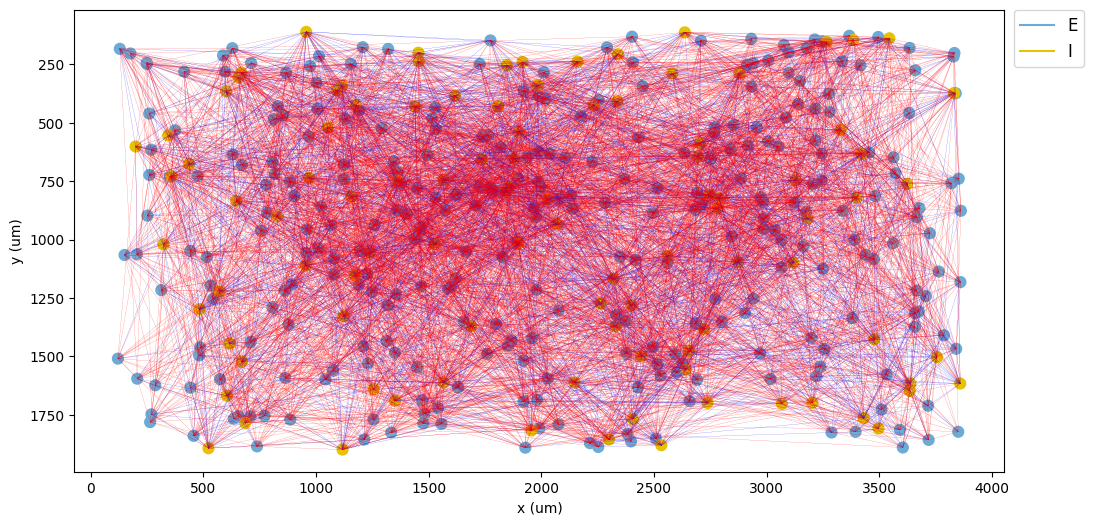

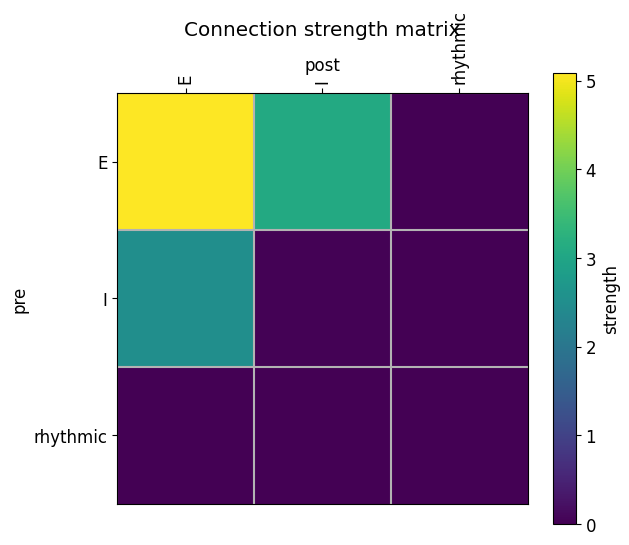

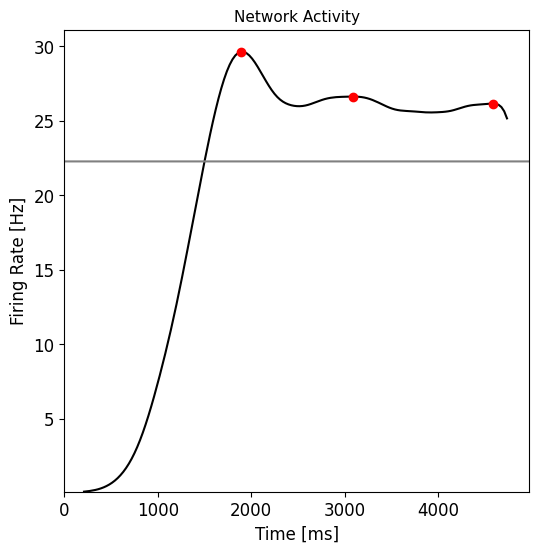

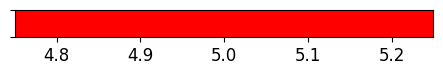

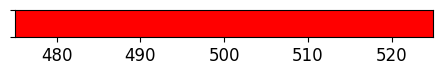

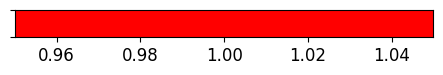

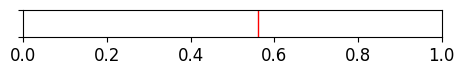

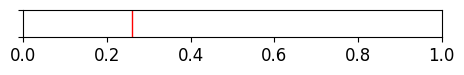

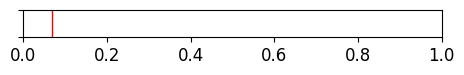

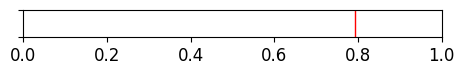

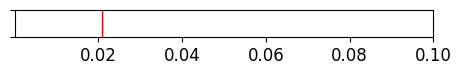

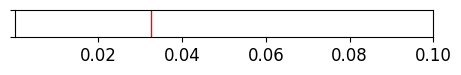

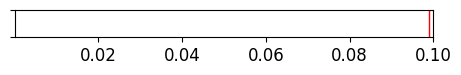

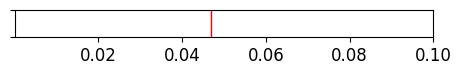

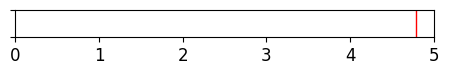

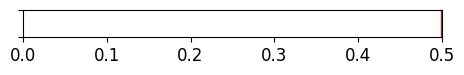

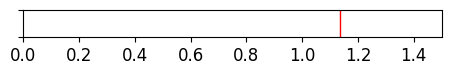

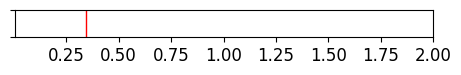

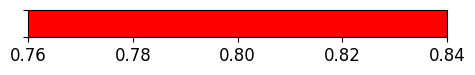

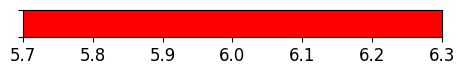

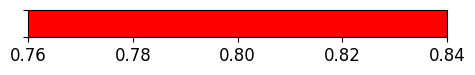

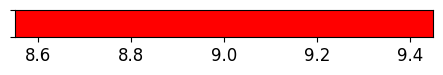

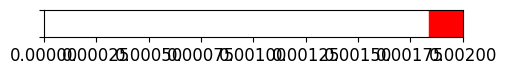

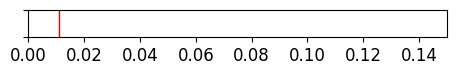

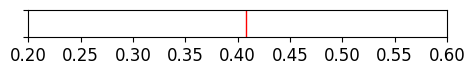

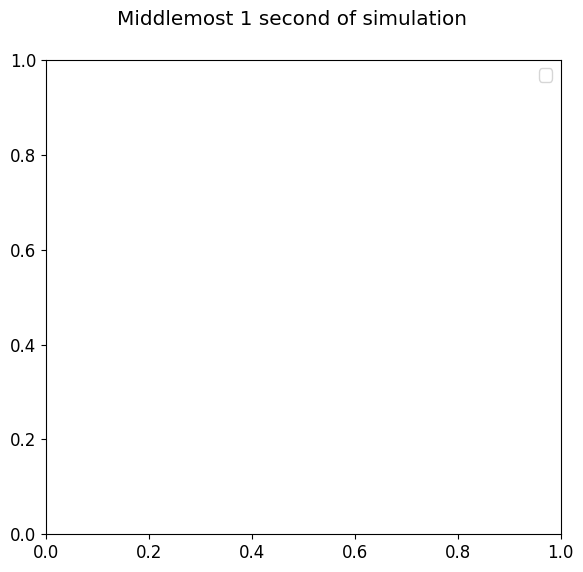

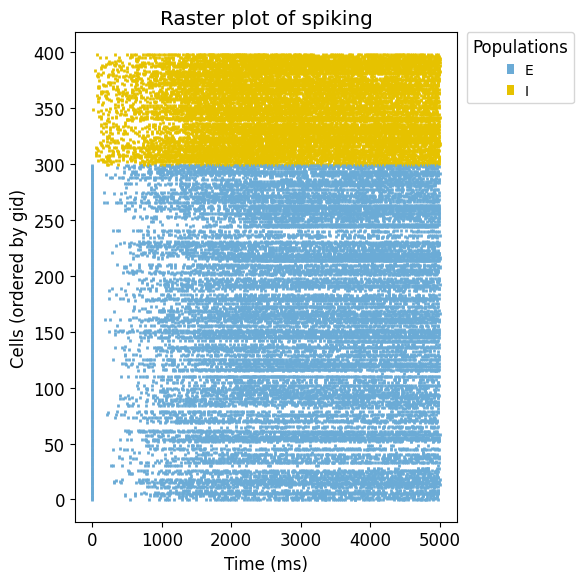

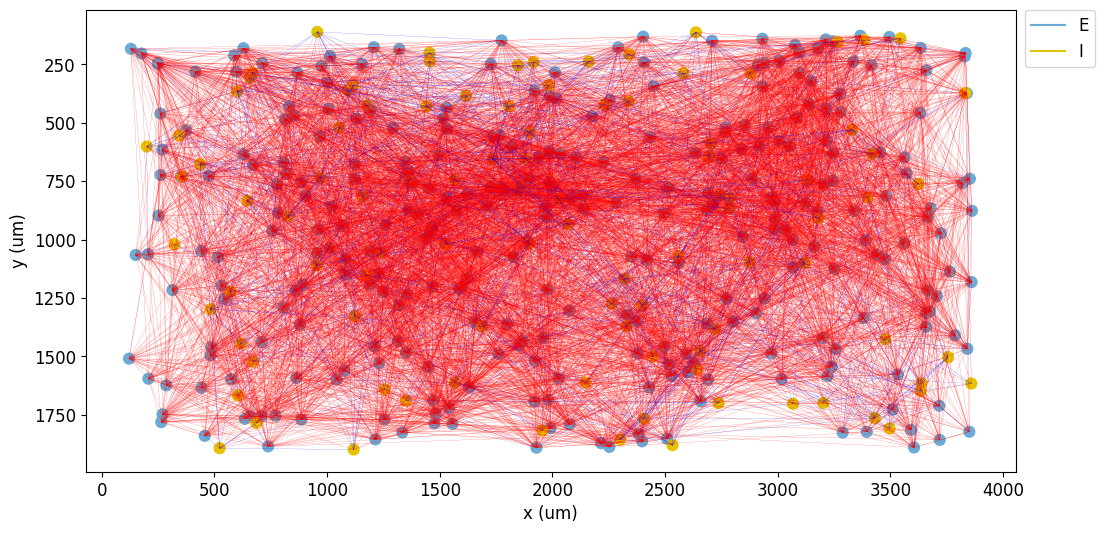

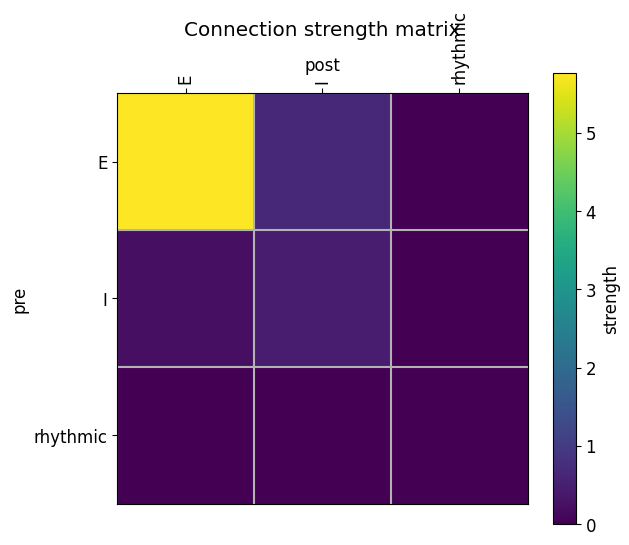

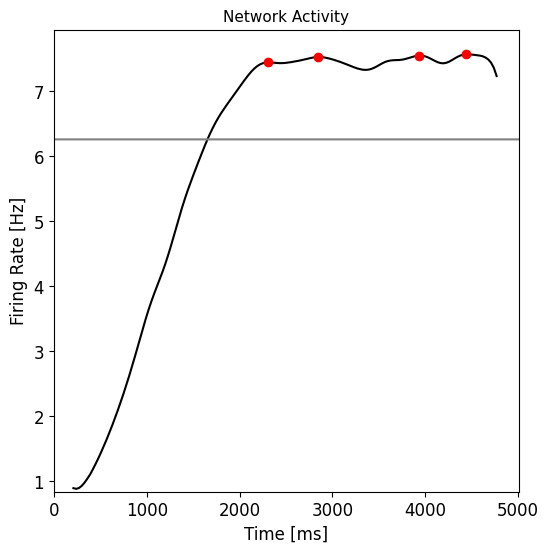

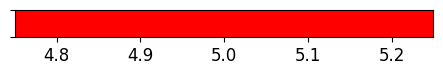

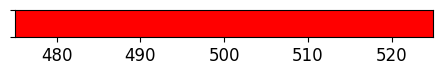

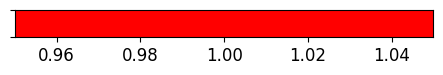

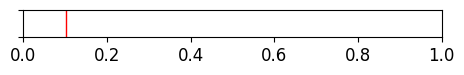

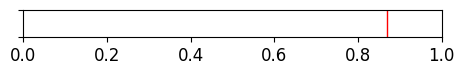

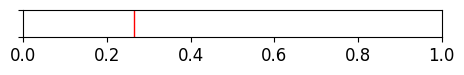

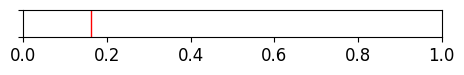

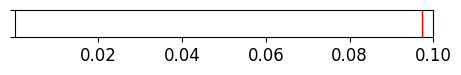

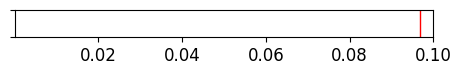

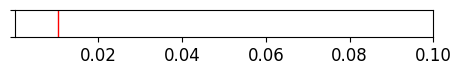

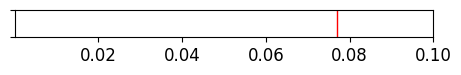

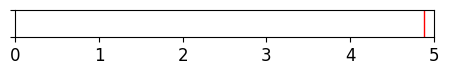

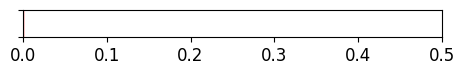

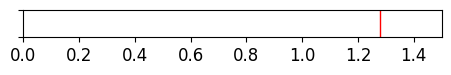

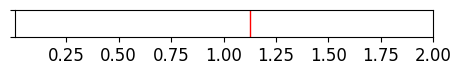

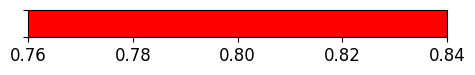

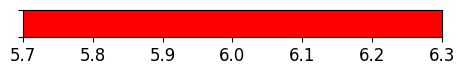

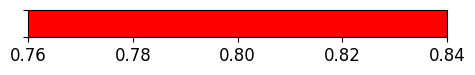

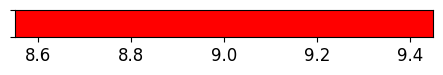

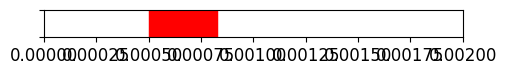

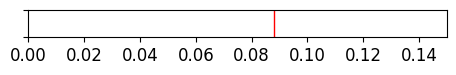

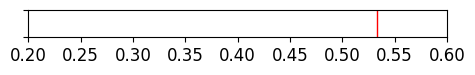

In [1]:
import os
import json

timeout = None
fitness_thresh = 300
output_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output/24-3-24_5sec_baselineSearch_75-25'
for gen_folder in os.listdir(output_path):

    #print(f"Generation Complete. Plotting figures with below threshold fitness: {fitness_thresh}")
    print(f'Plotting...')        
    try: from batch_run_files.plot_config import plot_sim_figs
    except: from plot_config import plot_sim_figs
    batch_run_path = output_path
    gen_path = os.path.join(batch_run_path, gen_folder)
    plot_report_path = f'{output_path}/{gen_folder}/plot_report.json'
    net_activity_params = {'binSize': .03*1000, 'gaussianSigma': .12*1000, 'thresholdBurst': 1.0}
    plot_report = plot_sim_figs(gen_path, fitness_threshold = fitness_thresh, simLabel = None, net_activity_params = net_activity_params, timeout = timeout)
    if len(plot_report) > 0:    
        with open(plot_report_path, 'w') as f:
            json.dump(plot_report, f)

In [2]:
## Prepare Folder for Roy
import shutil
import os
import fnmatch

output_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output'
#output_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output'
#reports_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/reports'
reports_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/reports'
overwrite = False

#walk through output_path, find all .svg and .png files, copy to new folder
for root, dirs, files in os.walk(output_path):
    if '.archive' in root: continue
    for file in files:
        report_file_types = ['.svg', '.png', '.pdf', '.csv', '.run', '.err', '.json', '.log']
        image_file_types = ['.svg', '.png'] 
        info_file_types = ['.pdf', 
                           #'.csv', 
                           '.run', '.err', '.json', '.log'] 
        if file.endswith(tuple(report_file_types)):
            file_path = os.path.join(root, file)
            new_path = file_path.replace(output_path, reports_path)
            new_dir = os.path.dirname(new_path)

            if file.endswith(tuple(info_file_types)):
               # Split the file path into directories
                directories = file_path.split(os.sep)
                # Check if any directory matches the pattern "gen_*"
                if any(fnmatch.fnmatch(dir, 'gen_*') for dir in directories):
                    continue  # Skip info files in gen folders
                new_dir = os.path.join(new_dir, 'batch_run_files')
                new_path = os.path.join(new_dir, file)
            
            #If file name contains "param_summary_row", copy to the grandparent folder instead
            if 'param_summary_row.png' in file:
                new_dir = os.path.dirname(new_dir)
                new_dir = os.path.dirname(new_dir)
                new_path = os.path.join(new_dir, file)
            
            #If file name contains ".csv"
            if '.csv' in file:
                #new_dir = os.path.dirname(new_dir)
                new_path = os.path.join(new_dir, file)

            #make sure the new directory exists
            if not os.path.exists(new_dir):
                os.makedirs(new_dir)
            if not os.path.exists(new_path) and overwrite is False:
                shutil.copy(file_path, new_path)
                print(f'Copied {file_path} to {new_path}')
            elif overwrite is True:
                shutil.copy(file_path, new_path)
                print(f'Copied {file_path} to {new_path}')

Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output/24-3-24_5sec_baselineSearch_75-25/gen_18/gen_18_cand_2/gen_18_cand_2__raster.svg to /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/reports/24-3-24_5sec_baselineSearch_75-25/gen_18/gen_18_cand_2/gen_18_cand_2__raster.svg
Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output/24-3-24_5sec_baselineSearch_75-25/gen_18/gen_18_cand_2/gen_18_cand_2__plot_2Dnet.svg to /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/reports/24-3-24_5sec_baselineSearch_75-25/gen_18/gen_18_cand_2/gen_18_cand_2__plot_2Dnet.svg
Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment